<h1>Teriam chuvas acima da média contribuído para o desastre em Brumadinho?</h1>
<h3> Análise sobre possível impacto das chuvas no rompimento da barragem de Brumadinho</h3>

<br>
<br>

Em 25 de janeiro de 2019, a Barragem I da mina do Córrego do Feijão em Brumadinho (MG) se rompeu, dando origem a um dos maiores desastres humanos e ambientais da história do Brasil. Quase um ano depois, 255 pessoas foram encontradas mortas e 15 ainda estão desaparecidas. Logo após os primeiros desdobramentos, um dos fatores especulados como uma possível causa da tragédia, inclusive por veículos da imprensa<sup><a href="#link1">[1]</a></sup>, foi a quantidade de chuvas na região.

Em seu relatório *Mine Tailing Storage: Safety is no Accident*<sup><a href="#link2">[2]</a></sup>, de 2017, a Organização das Nações Unidas afirma que chuvas fortes e prolongadas, furacões e abalos sísmicos até podem ser gatilhos para rupturas e transbordamentos, mas mesmo nesses casos a ONU considera que houve erro humano, já que o planejamento de risco para construção e manutenção da barragem deve levar em conta as condições climáticas do local. Sobre o relatório, Alex Bastos, professor de Geologia da Universidade Federal do Espírito Santo e integrante do comitê da ONU sobre barragens de minério, resume: "A conclusão do estudo é que existem dois motivos causadores de rompimentos: erro na análise de risco e negligência na manutenção da barragem. Ou seja, se teve uma chuva torrencial que causou transbordamento da barragem, houve aí um erro na análise de risco. Se a região está sujeita a uma chuva assim, a estrutura da barragem deveria ser outra. A análise de risco tem que ser precisa."

De qualquer forma, antes de analisar a participação do fator precipitação no desastre, precisamos nos perguntar: houveram, de fato, chuvas acima da média que poderiam ter impactado no rompimento da barragem de Brumadinho? Essa é a pergunta que tentaremos responder neste artigo em formato de Jupyter Notebook.

## Dados analisados

Para realizar nosso estudo, conjuntos de dados disponíveis publicamente no Sistema Nacional de Informações sobre Recursos Hídricos (SNIRH) da Agência Nacional de Águas (ANA) e no CEMADEN (Centro Nacional de Monitoramento e Alertas de Desastres Naturais), agências do governo brasileiro, foram usados para coletar informações sobre precipitação nas proximidades da barragem e analisar se haveria algum padrão anormal de chuva que poderia ter contribuído para o desastre.  

* <a href="http://www.snirh.gov.br/hidroweb/rest/api/documento/convencionais?tipo=3&documentos=2044008" target="_blank">Dados da estação de Melo Franco no SNIRH da ANA<sup>[3]</sup></a>
* <a href="http://www.cemaden.gov.br/mapainterativo/download/downpluv.php" target="_blank">Dados das estações do CEMANDEN<sup>[4]</sup></a>

As estações meteorológicas do entorno foram reduzidas às 6 mais próximas da barragem, variando de 8,81 a 2,16 km de distância, de modo que sempre fossem utilizados os dados da estação mais próxima que estivessem disponíveis em cada período (no caso das estações do CEMANDEN). No mapa a seguir é possível ver a disposição geográfica da estação de Melo Franco da ANA (ponto em azul), das estações de Aranha, Alberto Flores, Centro, Córrego do Feijão e Distrito de Casa Branca do CEMADEN (pontos em verde) e da barragem que se rompeu (x em vermelho).

In [1]:
import matplotlib.pyplot as plt
import mplleaflet

plt.figure(figsize=(6, 6))

# Estações da ANA
plt.plot(-44.120881, -20.197752, 'bo', ms=10)   # Melo Franco (02044008) [8,81 km (5.47 mi)]

# Estações do CEMANDEN
# plt.plot(-44.2, -20.143, 'go', ms=10)     # Centro (310900601A) [8,98 km (5.58 mi)]
# plt.plot(-44.216, -20.146, 'go', ms=10)   # Progresso (310900602A) [10,67 km (6.63 mi)]
plt.plot(-44.047, -20.094, 'go', ms=10)   # Distrito Casa Branca (310900603A) [7,91 km (4.92 mi)]
# plt.plot(-44.023, -20.165, 'go', ms=10)   # Rua Prefeito Maciel (310900604A) [11,18 km (6.95 mi)]
plt.plot(-44.107, -20.135, 'go', ms=10)   # Córrego do Feijão (310900605A) [2,16 km (1.34 mi)]
# plt.plot(-44.2009, -20.1409, 'go', ms=10) # Rio Paraopeba (310900605H) [9,00 km (5.59 mi)]
plt.plot(-44.147, -20.156, 'go', ms=10)   # Alberto Flores (310900606A) [5,14 km (3.19 mi)]
plt.plot(-44.198, -20.142, 'go', ms=10)   # Centro (310900607A) [8,74 km (5.43 mi)]
plt.plot(-44.105, -20.196, 'go', ms=10)   # Aranha (310900608A) [8,72 km (5.42 mi)]
# plt.plot(-44.227, -20.12, 'go', ms=10)    # Inhotim (310900609A) [11,38 km (7.07 mi)]

# Barragem I
plt.plot(-44.118047, -20.118579, 'rX', ms=10)
    
mplleaflet.display()

Por se tratarem de dados de fontes distintas, os formatos e disposições dos arquivos são bem diferentes e precisarão de manipulação específica. Os dados de cada estação da ANA são consolidados em um único arquivo CSV, que possui alguns cabeçalhos e legendas que precisarão ser ignorados. Já os dados do CEMADEN são divididos por município e mês, ou seja, apesar de um arquivo conter dados de todas as estações do município, são necessários diversos arquivos para se analisar um período de alguns anos.

Abaixo temos a visualização de uma amostra de dois desses arquivos:

In [2]:
from IPython.display import display, Pretty

# Dados da estação de Melo Franco da ANA (primeiras 50 linhas do arquivo)
display(Pretty(filename ='data/chuvas_C_02044008[sample].csv'))

Sistema de Informações Hidrológicas
Versão Web 3.0
© 2018 Agência Nacional de Águas (ANA)

NivelConsistencia: 1 = Bruto, 2 = Consistido
TipoMedicaoChuvas: 1 = Pluviômetro, 2 = Pluviógrafo, 3 = Data logger
Status: 0 = Branco, 1 = Real, 2 = Estimado, 3 = Duvidoso, 4 = Acumulado

Restrições da consulta:
Código da Estação:02044008


EstacaoCodigo;NivelConsistencia;Data;TipoMedicaoChuvas;Maxima;Total;DiaMaxima;NumDiasDeChuva;MaximaStatus;TotalStatus;NumDiasDeChuvaStatus;TotalAnual;TotalAnualStatus;Chuva01;Chuva02;Chuva03;Chuva04;Chuva05;Chuva06;Chuva07;Chuva08;Chuva09;Chuva10;Chuva11;Chuva12;Chuva13;Chuva14;Chuva15;Chuva16;Chuva17;Chuva18;Chuva19;Chuva20;Chuva21;Chuva22;Chuva23;Chuva24;Chuva25;Chuva26;Chuva27;Chuva28;Chuva29;Chuva30;Chuva31;Chuva01Status;Chuva02Status;Chuva03Status;Chuva04Status;Chuva05Status;Chuva06Status;Chuva07Status;Chuva08Status;Chuva09Status;Chuva10Status;Chuva11Status;Chuva12Status;Chuva13Status;Chuva14Status;Chuva15Status;Chuva16Status;Chuva17Status;Chuva18Status;Ch

In [3]:
# Dados das estações do CEMADEN em Brumadinho no mês de janeiro de 2014 (primeiras 50 linhas do arquivo)
display(Pretty(filename ='data/3277_MG_2014_1[sample].csv'))

municipio;codEstacao;uf;nomeEstacao;latitude;longitude;datahora;valorMedida
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 00:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 01:41:09;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 02:40:29;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 03:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 04:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 05:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 06:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 07:40:38;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 08:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 09:40:29;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 10:40:27;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 11:40:30;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,2

## Limpeza e tratamento dos dados

Nosso objetivo final é consolidar, em um único DataFrame por dataset, o acumulado de chuvas por mês, de forma que consigamos criar visualizações que permitam fazer nossa análise. Os dados da ANA já possuem uma consolidação mensal e estão todos dispostos em um único arquivo, então vamos começar por ele.

Uma breve inspeção nos mostra alguns detalhes que vamos precisar levar em conta na hora de dizer para o Pandas como carregar esse arquivo:

* o separador é ';' e não ',' como é o padrão para arquivos CSV
* as 12 primeiras linhas são uma espécie de legenda que precisaremos ignorar
* os números estão no padrão brasileiro, com vírgula separando os decimais, o que também não é o padrão do Pandas
* por último, já poderíamos indicar qual coluna usar como índice para as linhas, mas como precisaremos fazer alguns tratamentos nela também, por enquanto vamos carregar o arquivo com o índice padrão

Dito isso, podemos carregar nossos dados assim:

In [4]:
import pandas as pd

# Por uma questão de desempenho, o Pandas por padrão trunca o total de linhas e colunas a serem exibidos.
# As linhas a seguir modificam essa configuração e instruem a biblioteca a exibir mais ou menos dados.
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

"""
Aqui utilizamos _ como nome do nosso DataFrame em tratamento. Apesar de _ ser um nome de variável válido em Python,
geralmente não é uma boa prática em engenharia de software dar um nome tão pouco explicativo como esse a uma variável. Porém,
como veremos adiante, muitas operações requerem a repetição frequente do nome do DataFrame, o que pode deixar as linhas muito
longas, por isso vamos usar desse artifício para manter as linhas de código o mais curtas o possível até terminarmos a limpeza
e o tratamento de nossos dados.
"""

_ = pd.read_csv('data/chuvas_C_02044008.csv', decimal=',', index_col=False, sep=';', skiprows=12)
_

,EstacaoCodigo,NivelConsistencia,Data,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
0,2044008,1,01/07/2019,1,5.1,7.3,3.0,2.0,1,1,1,NaN,0,0.0,0.0,5.1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1,2044008,1,01/06/2019,1,11.0,11.4,4.0,2.0,1,1,1,NaN,0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2,2044008,1,01/05/2019,1,23.9,47.7,15.0,3.0,1,1,1,NaN,0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.9,22.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
3,2044008,1,01/04/2019,1,35.5,82.1,6.0,8.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,0.2,35.5,0.5,0.0,3.0,2.8,0.0,0.0,0.0,0.0,0.0,13.3,22.7,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
4,2044008,1,01/03/2019,1,37.8,120.8,11.0,8.0,1,1,1,NaN,0,27.3,2.2,0.0,0.0,0.0,3.4,0.0,0.0,0.0,11.3,37.8,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,11.0,27.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
5,2044008,1,01/02/2019,1,37.3,207.6,17.0,13.0,1,1,1,NaN,0,0.0,0.0,0.0,26.4,8.5,12.5,6.2,5.3,0.0,0.0,0.0,0.0,0.0,20.7,0.0,7.0,37.3,9.6,7.9,0.0,13.1,0.0,0.0,0.0,0.0,0.0,27.8,25.3,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0
6,2044008,1,01/01/2019,1,20.0,47.6,5.0,6.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,20.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.4,2.2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
7,2044008,1,01/12/2018,1,38.9,193.8,25.0,15.0,1,1,1,NaN,0,28.0,20.4,18.4,0.5,0.0,0.2,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,0.0,0.3,0.0,8.6,38.9,5.3,29.4,17.3,14.4,6.4,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
8,2044008,1,01/11/2018,1,28.4,172.7,9.0,12.0,1,1,1,NaN,0,0.0,4.3,0.0,0.0,0.0,0.0,5.0,26.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,7.4,19.4,22.4,23.6,0.0,4.1,26.7,4.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
9,2044008,1,01/10/2018,1,33.0,101.9,25.0,9.0,1,1,1,NaN,0,5.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,10.2,0.0,0.0,0.0,21.1,0.0,0.0,16.0,0.3,0.0,0.0,0.0,0.0,33.0,9.1,1.7,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0


O que de fato nos interessa está nas colunas 'Data' e 'Total'. Elas que nos dizem o quanto choveu em cada mês na região da estação de Melo Franco. Vamos então fazer um recorte desses dados para ter uma visão mais detalhada. Antes, porém, vamos transformar os dados da coluna 'Data' de forma que o Pandas consiga trabalhar com essa informação em formato temporal.

In [5]:
_['Data'] = pd.to_datetime(_['Data'], dayfirst=True)
_[['Data','Total']]

,Data,Total
0,2019-07-01,7.3
1,2019-06-01,11.4
2,2019-05-01,47.7
3,2019-04-01,82.1
4,2019-03-01,120.8
5,2019-02-01,207.6
6,2019-01-01,47.6
7,2018-12-01,193.8
8,2018-11-01,172.7
9,2018-10-01,101.9


Em um mundo perfeito os dados já estariam praticamente na forma que precisamos, mas para uma melhor qualidade nos nossos resultados, temos que nos atentar para dois outros pontos:

1. Do início de 1941 ao fim de 2019 existe um total de 948 meses, porém temos mais de 1700 linhas em nosso DataFrame, ou seja, temos datas repetidas.
2. Na legenda do arquivo, além de 'NivelConsistencia' e 'TipoMedicaoChuvas', também está a definição de 'Status' e nem todos são úteis para nós.

Começaremos pelo tratamento das datas repetidas. Na verdade, se analisarmos com atenção, as datas estão repetidas mas com níveis de consistência diferentes (indicados na coluna 'NivelConsistencia'). Uma consulta ao site da ANA revela o que isso significa:
> "A análise de consistência dos dados pluviométricos deve ter como objetivo a identificação e correção de erros, bem como o preenchimento de falhas das séries pluviométricas."<sup><a href="#link5">[5]</a></sup>

Logo, dados consistidos são aqueles que já passaram por essa análise e correção de possíveis falhas. Sendo assim, sempre que possível, daremos prioridade aos dados que já estiverem consistidos ('NivelConsistencia' = 2), faremos isso criando uma máscara booleana que quando aplicada vai filtrar as linhas e retornar somente as versões com maior nível de consistência para cada data. Vamos criar também outra máscara para remover os dados posteriores a janeiro de 2019.

Por fim, vamos aproveitar para ordenar os dados de forma crescente pela data e transformar nossa coluna 'Data' no índice do nosso DataFrame.

In [6]:
mask1 = _.groupby(['Data'])['NivelConsistencia'].transform(max) == _['NivelConsistencia']
mask2 = (_['Data'].dt.year < 2019) | ((_['Data'].dt.year == 2019) & (_['Data'].dt.month == 1))

_ = _[mask1 & mask2].sort_values('Data')
_.set_index('Data', inplace=True)
_

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1941-07-01,2044008,2,1,16.5,20.4,19.0,NaN,1,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.5,0.0,1.8,16.5,0.0,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-08-01,2044008,2,1,1.2,1.2,18.0,1.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-09-01,2044008,2,1,NaN,8.1,NaN,NaN,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1941-10-01,2044008,2,1,42.0,83.1,17.0,5.0,1,1,1,NaN,0,0.0,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,42.0,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-11-01,2044008,2,1,52.9,184.5,7.0,10.0,1,1,1,NaN,0,13.6,5.4,0.0,0.0,0.0,0.0,52.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.9,0.0,0.0,0.0,0.0,5.1,0.0,0.0,20.4,23.4,21.1,6.3,22.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
1941-12-01,2044008,2,1,38.0,245.5,4.0,20.0,1,1,1,NaN,0,17.1,17.4,3.1,38.0,2.1,0.0,4.1,0.0,0.0,13.3,2.0,0.0,0.0,4.0,0.0,0.0,0.0,8.4,15.0,0.0,11.4,0.0,36.2,3.1,0.0,3.2,1.9,17.6,14.3,31.3,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1942-01-01,2044008,2,1,67.1,287.2,21.0,13.0,1,1,1,1487.000000,2,2.0,0.0,0.0,1.2,39.3,21.1,10.4,4.0,44.0,14.2,44.3,18.1,0.0,0.0,0.0,0.0,16.4,0.0,0.0,0.0,67.1,0.0,0.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1942-02-01,2044008,2,1,NaN,182.4,NaN,NaN,0,2,0,1487.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1942-03-01,2044008,2,1,23.2,125.9,9.0,10.0,1,1,1,1487.000000,2,22.4,13.3,0.0,3.1,11.1,0.0,0.0,0.0,23.2,10.3,16.4,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.3,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0


Resolvemos o primeiro ponto, resta a questão dos status. Primeiramente, vamos ver qual a quantidade de cada status que nós temos para o dado que nos interessa:

In [7]:
_['TotalStatus'].value_counts()

1    888
2     37
0      3
3      2
Name: TotalStatus, dtype: int64

A primeira boa notícia é não termos status 4 ('Acumulado') para o 'Total', o que faz sentido uma vez que essa já é uma medida cumulativa. Outra é o fato de apenas 42 das 930 entradas não estarem no status que queremos, o que representa menos de 5% da amostra. Já que queremos gerar uma série de médias, faz sentido abrirmos mão dos dados com grande incerteza (status 2 e 3) para evitar que eles contaminem nossa amostra e consequentemente distorçam nossos resultados.

Entretando, três entradas estão com o status 0, o que significa uma inconsistência. Vejamos:

In [8]:
_[_['TotalStatus'] == 0]

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,16.0,0.0,24.1,6.3,26.1,2.4,24.9,0.0,0.0,0.0,2.4,26.5,11.9,0.0,0.0,0.0,0.0,0.0,1.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2011-12-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,6.9,1.5,47.7,0.0,0.0,0.0,2.2,38.5,1.5,0.4,19.6,0.0,2.5,0.0,71.4,34.2,55.0,37.4,50.2,24.9,0.0,0.0,18.9,0.0,0.0,0.0,31.5,21.8,18.3,5.8,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2014-10-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2.4,1.2,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,12.9,73.5,0.0,0.0,0.0,0.0,6.9,18.0,9.1,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0


Por algum motivo, a coluna 'Total' não foi corretamente aferida mas todas as medições diárias estão presentes e, melhor, todas elas tem status 1, indicando que são medições reais. Provavelmente essas inconsistências seriam corrigidas quandos os dados fossem consistidos (notem que 'NivelConssistencia' é 1 para essas linhas), mas felizmente temos dados suficientes para fazermos isso nós mesmos. 

In [9]:
# Atualizando 'Total' e 'TotalStatus'
# Note que se algum dos dias tivesse um status diferente de 1, nosso 'TotalStatus' também seria diferente
_.at['2011-10-01', 'Total'] = _.loc['2011-10-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2011-10-01', 'TotalStatus'] = _.loc['2011-10-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()
_.at['2011-12-01', 'Total'] = _.loc['2011-12-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2011-12-01', 'TotalStatus'] = _.loc['2011-12-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()
_.at['2014-10-01', 'Total'] = _.loc['2014-10-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2014-10-01', 'TotalStatus'] = _.loc['2014-10-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()

_.loc[[pd.to_datetime('2011-10-01'), pd.to_datetime('2011-12-01'), pd.to_datetime('2014-10-01')]]

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-01,2044008,1,1,NaN,160.6,NaN,NaN,0,1.0,0,NaN,0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,16.0,0.0,24.1,6.3,26.1,2.4,24.9,0.0,0.0,0.0,2.4,26.5,11.9,0.0,0.0,0.0,0.0,0.0,1.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2011-12-01,2044008,1,1,NaN,490.2,NaN,NaN,0,1.0,0,NaN,0,6.9,1.5,47.7,0.0,0.0,0.0,2.2,38.5,1.5,0.4,19.6,0.0,2.5,0.0,71.4,34.2,55.0,37.4,50.2,24.9,0.0,0.0,18.9,0.0,0.0,0.0,31.5,21.8,18.3,5.8,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2014-10-01,2044008,1,1,NaN,157.6,NaN,NaN,0,1.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2.4,1.2,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,12.9,73.5,0.0,0.0,0.0,0.0,6.9,18.0,9.1,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0


Ótimo! Agora podemos nos livrar das medidas imprecisas e reduzir o DataFrame a uma Série que contém apenas a coluna que realmente nos interessa, finalizando o tratamento para esse dataset.

In [10]:
df_ana = _[_['TotalStatus'] == 1]['Total'].rename('ANA')
df_ana.index.name = None
df_ana

1941-07-01     20.4
1941-08-01      1.2
1941-10-01     83.1
1941-11-01    184.5
1941-12-01    245.5
1942-01-01    287.2
1942-03-01    125.9
1942-04-01     46.9
1942-05-01     44.3
1942-06-01      3.5
1942-07-01      1.3
1942-08-01      0.0
1942-09-01     97.0
1942-10-01    127.2
1942-11-01    184.6
1942-12-01    386.7
1943-01-01    332.2
1943-02-01    257.3
1943-03-01    217.0
1943-04-01      6.0
1943-05-01      0.0
1943-06-01     16.1
1943-07-01      0.0
1943-08-01     27.4
1943-09-01     30.9
              ...  
2016-12-01    266.9
2017-01-01    108.3
2017-02-01    105.1
2017-03-01     99.7
2017-04-01     31.9
2017-05-01     22.0
2017-06-01     21.4
2017-08-01      0.0
2017-09-01      0.0
2017-10-01    137.1
2017-11-01    139.5
2017-12-01    415.5
2018-01-01    225.5
2018-02-01    217.1
2018-03-01    257.3
2018-04-01     21.7
2018-05-01      5.6
2018-06-01      0.0
2018-07-01      0.0
2018-08-01     39.2
2018-09-01     92.4
2018-10-01    101.9
2018-11-01    172.7
2018-12-01    193.8


Agora vamos fazer a limpeza e o tratamento dos dados das estações do CEMADEN. Como dito anteriormente, esses dados estão dispostos em diversos arquivos, por isso teremos que usar uma nova biblioteca para percorrer todos esses arquivos e consolidar os dados em um único DataFrame. Logo no carregamento, além do tratamento para o separador, decimal e índice, vamos já definir quais colunas queremos carregar. O ideal é restringir os dados apenas ao que precisamos sempre que possível, pois isso diminui a quantidade de memória e o processamento necessários para lidar com os dados.

No caso anterior, como tínhamos apenas um arquivo era mais fácil verificar o formato em que as informações foram registradas, mas agora estamos lidado com um dataset dividido em mais de 60 arquivos e ao inspecionar apenas um deles não é possível ter essa garantia. Sendo assim, ao concatenarmos os dados de cada arquivo, vamos preservar o índice original e aproveitar disso para imprimir a primeira linha de cada um, verificando se tudo occoreu como deveria.

In [11]:
import glob

pd.set_option('display.max_rows', 100)

df1 = pd.concat([pd.read_csv(f,
                             sep=';',
                             index_col=False,
                             decimal=',',
                             usecols=['codEstacao','datahora','valorMedida']) for f in glob.glob('data/3277_MG_*.csv')])

df1.loc[0]

,codEstacao,datahora,valorMedida
0,310900602A,01/01/2014 00:40:28,0
0,310900602A,01/10/2014 00:00:00,0
0,310900602A,01/11/2014 00:00:00,0
0,310900602A,01/12/2014 00:00:00,0
0,310900602A,01/01/2014 00:40:28,0
0,310900607A,01/02/2014 00:30:27,0
0,310900608A,01/03/2014 00:00:00,0
0,310900604A,01/04/2014 00:00:00,0
0,310900604A,01/05/2014 00:00:00,0
0,310900603A,01/06/2014 00:00:00,0


Foi bom termos tomado esse cuidado pois, pelo que vemos, a forma de registrar os dados mudou ao longo do tempo. De fato, se olharmos linha por linha, podemos identificar três padrões distintos:

1. Até março de 2015, tanto as datas quanto os valores estavam no padrão brasileiro (dia/mês/ano e decimais separados por vírgula)
2. Em abril, maio, junho e julho de 2015, as datas estão em formato internacional e os valores estão com os decimais separados por ponto
3. A partir de agosto de 2015, as datas se mantém no padrão internacional mas os valores voltam a ser registrados no padrão brasileiro

Sabendo disso, podemos renomear os arquivos de forma que os nomes distingam o padrão utilizado em cada um, assim conseguimos carregá-los de forma independente para fazer os tratamentos necessários.

In [12]:
df_br_date = pd.concat([pd.read_csv(f,
                                    sep=';',
                                    index_col=False,
                                    decimal=',',
                                    usecols=['codEstacao','datahora','valorMedida']) for f in glob.glob('data/renamed/_3277_MG_*.csv')],
                       ignore_index=True)

df_dot_decimal = pd.concat([pd.read_csv(f,
                                        sep=';',
                                        index_col=False,
                                        usecols=['codEstacao','datahora','valorMedida']) for f in glob.glob('data/renamed/dot_3277_MG_*.csv')],
                           ignore_index=True)

df_us_date = pd.concat([pd.read_csv(f,
                                    sep=';',
                                    index_col=False,
                                    decimal=',',
                                    usecols=['codEstacao','datahora','valorMedida']) for f in glob.glob('data/renamed/3277_MG_*.csv')],
                       ignore_index=True)

df_br_date['datahora'] = pd.to_datetime(df_br_date['datahora'], dayfirst=True)
df_dot_decimal['datahora'] = pd.to_datetime(df_dot_decimal['datahora'])
df_us_date['datahora'] = pd.to_datetime(df_us_date['datahora'])

print(df_br_date.head())
print(df_dot_decimal.head())
print(df_us_date.head())

   codEstacao            datahora  valorMedida
0  310900602A 2014-01-01 00:40:28          0.0
1  310900602A 2014-01-01 01:41:09          0.0
2  310900602A 2014-01-01 02:40:29          0.0
3  310900602A 2014-01-01 03:40:28          0.0
4  310900602A 2014-01-01 04:40:28          0.0
   codEstacao            datahora  valorMedida
0  310900602A 2015-04-01 00:00:00          0.0
1  310900602A 2015-04-01 01:00:00          0.0
2  310900602A 2015-04-01 02:00:00          0.0
3  310900602A 2015-04-01 03:00:00          0.0
4  310900602A 2015-04-01 04:00:00          0.0
   codEstacao            datahora  valorMedida
0  310900601A 2015-10-01 00:00:00          0.0
1  310900601A 2015-10-01 01:00:00          0.0
2  310900601A 2015-10-01 02:00:00          0.0
3  310900601A 2015-10-01 03:00:00          0.0
4  310900601A 2015-10-01 04:00:00          0.0


Ótimo, agora que temos todos os nossos dados no mesmo formato podemos combiná-los novamente em um só DataFrame.

In [13]:
df2 = pd.concat([df_br_date, df_dot_decimal, df_us_date], ignore_index=True)
df2.shape

(498263, 3)

A quantidade de dados que temos aqui ainda é enorme, são quase um mihão e meio de células, o que ainda deixa nossas operações lentas. Podemos restringir um pouco mais os dados filtrando as estações distantes. Como dissemos, para facilitar a análise e não precisar recorrer a métodos mais complexos como Polígonos de Thiessen para fazer uma média ponderada entre todas as estações, decidimos utilizar sempre os dados geograficamente mais próximos à barragem. As estações do CEMADEN passaram a operar a partir de 2014, disponibilizando 10 novas fontes de dados, mas seguindo nossa ideia inicial poderíamos simplesmente utilizar os dados da estação mais próxima (a de Córrego do Feijão). Então, vejamos se podemos seguir com essa abordagem:

In [14]:
df3 = df2[df2['codEstacao'] == '310900605A'].copy()
df3.shape

(45953, 3)

Certo, analisando somente a estação de Córrego do Feijão reduzimos em mais de 90% a quantidade de dados, mas eles ainda estão dispostos por horário e nos precisamos deles consolidados por mês. O próximo passo é padronizar os horários de forma que consigamos fazer uma agregação. No momento isso não seria possível pois, como podemos ver nos blocos anteriores, os minutos e segundos nem sempre são os mesmos para todas as entradas. O site do CEMADEN explica os diferentes horários gravados em nosso DataFrame:
> "... os pluviômetros automáticos se conectam aos servidores do Cemaden e transmitem dados dos acumulados de chuva, em milímetros, a cada 10 minutos, sendo, então, processados e disponibilizados para a Sala de Situação do CEMADEN em plataforma especializada desenvolvida pelo Centro. Por outro lado, caso não esteja chovendo, o pluviômetro se conectará apenas uma vez a cada hora, enviando o acumulado de 0 milímetro dos últimos 60 minutos."<sup><a href="#link6">[6]</a></sup>

Então devemos partir do princípio que precisamos ter ao menos uma medição por hora. Em um mês de 28 dias temos 672 horas, em um de 29 temos 696, 30 dias tem 720 horas e, por fim, um mês de 31 dias tem 744 horas. Sabendo disso, vamos verificar a consistência dos dados que temos:

In [15]:
def hours_in_month(month, year):
    if month in (1,3,5,7,8,10,12):
        return 744
    elif month in (4,6,9,11):
        return 720
    elif year == 2016:
        return 696
    else:
        return 672

In [16]:
pd.set_option('display.max_rows', 70)

_ = df3[['valorMedida']].groupby(df3['datahora'].dt.floor('H')).sum().groupby(pd.Grouper(freq='MS')).count()
_['%'] = _.index.map(lambda dt: (_.loc[dt]['valorMedida']/hours_in_month(dt.month, dt.year)*100).round(2))
_ = _.rename(columns={'valorMedida': 'Horas com medições'})
_

,Horas com medições,%
datahora,,
2014-01-01,735,98.79
2014-02-01,613,91.22
2014-03-01,0,0.00
2014-04-01,0,0.00
2014-05-01,0,0.00
2014-06-01,0,0.00
2014-07-01,744,100.00
2014-08-01,744,100.00
2014-09-01,720,100.00


Pelo que vemos, a estação de Córrego do Feijão deixou de registrar ou transmitir informações durante vários momentos. Isso demonstra que só os dados dessa estação são insuficientes para obter toda a amostra que precisamos. Vamos usar então uma abordagem parecida com a que fizemos anteriormente com a coluna 'NivelConsistencia' no dateset da ANA e preencher as lacunas com os dados das outras estações do CEMADEN que sejam mais próximas, até termos dados suficientes.

In [17]:
df4 = df2[df2['codEstacao'].isin(['310900603A', '310900605A', '310900606A', '310900607A', '310900608A'])].copy()
df4['datahora'] = df4['datahora'].dt.floor('H')

df_corrego_feijao = df4[df4['codEstacao'] == '310900605A'][['datahora','valorMedida']]
df_alberto_flores = df4[df4['codEstacao'] == '310900606A'][['datahora','valorMedida']]
df_casa_branca = df4[df4['codEstacao'] == '310900603A'][['datahora','valorMedida']]
df_aranha = df4[df4['codEstacao'] == '310900608A'][['datahora','valorMedida']]
df_centro = df4[df4['codEstacao'] == '310900607A'][['datahora','valorMedida']]

df_corrego_feijao = df_corrego_feijao.groupby('datahora').sum()
df_alberto_flores = df_alberto_flores.groupby('datahora').sum()
df_casa_branca = df_casa_branca.groupby('datahora').sum()
df_aranha = df_aranha.groupby('datahora').sum()
df_centro = df_centro.groupby('datahora').sum()

df_cemaden = (df_corrego_feijao.combine_first(df_alberto_flores)
                               .combine_first(df_casa_branca)
                               .combine_first(df_aranha)
                               .combine_first(df_centro))

In [18]:
_ = pd.DataFrame(df_cemaden.groupby(pd.Grouper(freq='MS')).count()).rename(columns={'valorMedida': 'Horas com Medidas'})
_['%'] = _.index.map(lambda dt: (_.loc[dt]['Horas com Medidas']/hours_in_month(dt.month, dt.year)*100).round(2))
_

,Horas com Medidas,%
datahora,,
2014-01-01,736,98.92
2014-02-01,672,100.00
2014-03-01,742,99.73
2014-04-01,720,100.00
2014-05-01,744,100.00
2014-06-01,720,100.00
2014-07-01,744,100.00
2014-08-01,744,100.00
2014-09-01,720,100.00


Agora sim temos uma amostra relevante. Ainda temos alguns meses com dados ausentes, mas essas lacunas não chegam a representar nem 2% do total.

Então falta somente consolidar esses dados em um formato de Série, da mesma forma que fizemos com o dataset da ANA, e estaremos prontos para gerar as visualizações que nos ajudarão à responder nossa questão inicial. 

In [19]:
df_cemaden = df_cemaden.groupby(pd.Grouper(freq='MS')).sum().round(1)['valorMedida'].rename('CEMADEN')
df_cemaden.index.name = None
df_cemaden

2014-01-01     69.2
2014-02-01      7.0
2014-03-01     99.2
2014-04-01    148.1
2014-05-01     14.2
2014-06-01      5.2
2014-07-01      0.4
2014-08-01      4.3
2014-09-01     20.7
2014-10-01    172.8
2014-11-01    296.5
2014-12-01    108.5
2015-01-01    109.8
2015-02-01    219.8
2015-03-01    235.8
2015-04-01     11.9
2015-05-01     43.3
2015-06-01      9.1
2015-07-01     21.1
2015-08-01     44.8
2015-09-01    154.8
2015-10-01     58.8
2015-11-01    197.8
2015-12-01    182.1
2016-01-01    474.9
2016-02-01    112.6
2016-03-01    172.3
2016-04-01     37.2
2016-05-01      0.8
2016-06-01     77.7
2016-07-01     45.1
2016-08-01     34.2
2016-09-01     89.5
2016-10-01     69.5
2016-11-01    170.2
2016-12-01    347.8
2017-01-01    159.5
2017-02-01    135.9
2017-03-01    122.4
2017-04-01     23.0
2017-05-01     23.2
2017-06-01     10.7
2017-07-01      0.2
2017-08-01      0.0
2017-09-01     13.4
2017-10-01    126.6
2017-11-01    118.1
2017-12-01    264.2
2018-01-01    226.5
2018-02-01    247.9


## Visualizações

Com os dados limpos e tratados, podemos criar visualizações gráficas que não só nos ajudam a entender os dados como também permitem que identifiquemos padrões, anomalias e também respondamos a diversas questões de maneira imediata.

In [20]:
import locale

locale.setlocale(locale.LC_TIME, 'pt_BR')

import calendar
import matplotlib.ticker as ticker
import numpy as np

%matplotlib notebook

A primeira visualização que vamos criar é uma que mostra a quantidade de chuva acumulada no quarto semestre do ano em Brumadinho em três recortes: máxima histórica, média histórica e as medições de 2018. Isso para cada um dos datasets. O intuito aqui é conseguir identificar se procede a afirmação feita na reportagem<sup>[[1]](https://www.em.com.br/app/noticia/gerais/2019/09/25/interna_gerais,1087875/atividades-de-mina-da-vale-em-brumadinho-deviam-ter-parado-em-2016.shtml)</sup> citada no início do nosso artigo (de que no último semestre de 2018 teria chovido 72% acima da média em Brumadinho) e se esse valor é de fato uma anomalia significativa.

In [21]:
def precipitation_fourth_quarter(ana, cemaden):
    _ = ana[:-1].groupby(pd.Grouper(freq='QS')).sum()
    __ = cemaden[:-1].groupby(pd.Grouper(freq='QS')).sum()
    
    _ = _.groupby(_.index.month)
    __ = __.groupby(__.index.month)

    maxs_ana = _.max()
    maxs_cemaden = __.max()
    maxs_ana = maxs_ana.loc[10].sum()
    maxs_cemaden = maxs_cemaden.loc[10].sum()
    
    means_ana = _.mean()
    means_cemaden = __.mean()
    means_ana = means_ana.loc[10].sum()
    means_cemaden = means_cemaden.loc[10].sum()

    g_labels = ['ANA (1941 a 2018)', 'CEMADEN (2014 a 2018)']
    g_maxs = [maxs_ana, maxs_cemaden]
    g_means = [means_ana, means_cemaden]
    g_72p = [means_ana*1.72, means_cemaden*1.72]
    g_2018 = [ana.iloc[-4:-1].sum(), cemaden.iloc[-4:-1].sum()]
    
    x = np.arange(2)
    width = 0.20

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    
    rects1 = ax.bar(x - width, g_maxs, width, label='Máxima Histórica', color='tab:blue')
    rects2 = ax.bar(x, g_means, width, label='Média Histórica', color='tab:cyan')
    rects3 = ax.bar(x + width, g_2018, width, label='2018', color='tab:orange')
    
    for i, rects in enumerate([rects1, rects2, rects3]):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + 15,
                    '%d mm' % int(height), ha='center', va='bottom')

    ax.set_title('Precipitação Acumulada no 4º trimestre em Brumadinho', pad=17)
    ax.set_xticks(x)
    ax.set_xticklabels(g_labels)
    ax.set_yticklabels([])
    plt.tick_params(axis='both', length=0)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False, ncol=3)

    fig.tight_layout()
    
    plt.ylim(0, 1300)
    
    for s in ax.spines:
        ax.spines[s].set_visible(False)

    plt.show()

<IPython.core.display.Javascript object>


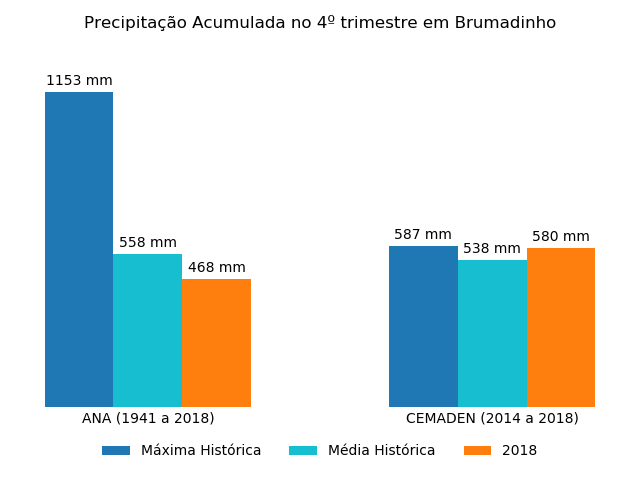

In [22]:
precipitation_fourth_quarter(df_ana, df_cemaden)

A próxima visualização vai exibir detalhes do perfil pluviométrico de Brumadinho. Vamos exibir em um só gráfico as médias históricas de chuvas por mês, as máximas históricas por mês e as medições reais de julho de 2018 a janeiro de 2019. A ideia é contrapor as chuvas dos meses anteriores à tragédia com o compartamento padrão de chuvas e também com o comportamento mais extremo já registrado na região.

In [23]:
def precipitation_profile(df):
    plt.figure(figsize=(6.4, 4.8))

    _ = df.iloc[:-7].groupby(df.iloc[:-7].index.month)

    maxs = _.max().rename(index=lambda x: calendar.month_abbr[x])
    means = _.mean().rename(index=lambda x: calendar.month_abbr[x])
    std_errors = (_.std()/np.sqrt(_.count())).rename(index=lambda x: calendar.month_abbr[x])
    
    shift_mask = calendar.month_abbr[7:14] + calendar.month_abbr[1:7]
    maxs = maxs.loc[shift_mask]
    means = means.loc[shift_mask]
    std_errors = std_errors.loc[shift_mask]

    x_axis = np.arange(12)
    means_plot = plt.bar(x_axis, means, yerr=std_errors*2, ecolor='tab:gray', color='tab:cyan')
    maxs_plot, = plt.plot(x_axis, maxs, '.:', color='tab:blue')
    measured_plot, = plt.plot(np.arange(7), df.iloc[-7:], 'o-',  color='tab:orange')
    
    plt.xticks(x_axis, shift_mask)
    plt.tick_params(axis='x', length=0)

    plt.title('Precipitação em Brumadinho [{}]'.format(df.name), pad=17)

    plt.ylim(0, 700)
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d mm'))

    plt.legend(handles=[maxs_plot, means_plot, measured_plot],
               labels=['Máximas Históricas', 'Médias Históricas', 'Julho/18 a Janeiro/19'],
               loc='upper center',
               fontsize='small',
               ncol=3,
               frameon=False,
               bbox_to_anchor=(0.5, -0.07))
    
    for s in ['bottom','right','top']:
        ax.spines[s].set_visible(False)

    plt.show()

<IPython.core.display.Javascript object>


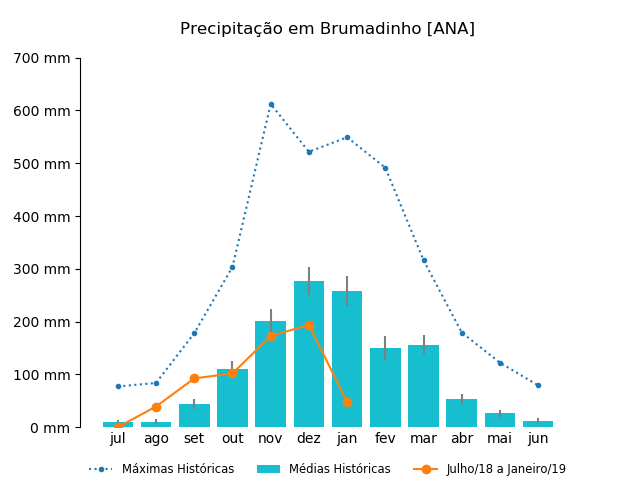

In [24]:
precipitation_profile(df_ana)

<IPython.core.display.Javascript object>


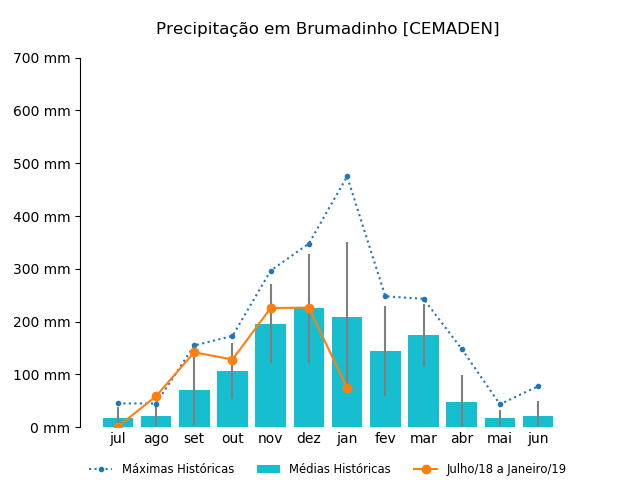

In [25]:
precipitation_profile(df_cemaden)

## Conclusão

Com ajuda das visualizações, podemos voltar às perguntas que nos propusemos a responder:

**- No último trimestre de 2018 choveu 72% acima da média pluviométrica em Brumadinho, como afirmou o jornal Estado de Minas em sua reportagem<sup><a href="#link1">[1]</a></sup>?**

Os dados do CEMADEN, disponíveis apenas a partir de 2014, formam uma amostra pequena para gerar um valor estatístico relevante, mas por se tratar de um orgão criado especificamente para o monitoramento de desastres naturais resolvemos verificar se o Estado de Minas havia utilizado esses números para fazer sua afirmação. Mas o fato é que as chuvas do último timestre de 2018, registradas pelo CEMADEN, foram apenas 7,8% acima da média. No caso dos dados da ANA, os registros de 2018 foram inclusive menores do que a média. Assim sendo, temos indícios suficientes para afirmar que a informação veiculada na reportagem não procede.

**- Houveram chuvas fora dos padrões e que poderiam ter impactado no rompimento da barragem de Brumadinho?**

A primeira análise que devemos fazer é a comparação entre os registros de julho de 2018 a janeiro de 2019 e as médias históricas. Os gráficos mostram que, dos 7 meses anteriores ao desastre, apenas agosto e setembro apresentaram chuvas consistentemente acima da média, mas mesmo assim em níveis que não chegam nem à metade da média histórica do mês mais chuvoso, por exemplo. Outubro e novembro foram dentro da média, oscilando para mais ou menos dependendo do dataset mas ainda assim dentro das margens do erro padrão. Porém, dezembro e principalmente janeiro, tipicamente os meses mais chuvosos, tiveram chuvas consideravelmente abaixo da média na virada do ano de 2019.

De fato, se formos fazer uma análise puramente sob a perspectiva da busca pela causa da tragédia, devemos ressaltar que os meses anteriores tiveram níveis de chuva muito abaixo das máximas históricas, o que demonstra que a quantidade de chuva na região não estava fora dos padrões esperados e não pode ser considerado um fator causador para o desastre, já que além de tudo os mais conservadores parâmetros deveriam ter sido levados em consideração ao se lidar com uma estrutura com tamanho potencial de destruição.

## Links relacionados

1. <a name="link1"></a>Reportagem "Atividades de mina da Vale em Brumadinho deviam ter parado em 2016, diz inquérito", do jornal Estado de Minas. https://www.em.com.br/app/noticia/gerais/2019/09/25/interna_gerais,1087875/atividades-de-mina-da-vale-em-brumadinho-deviam-ter-parado-em-2016.shtml
2. <a name="link2"></a>Relatório *Mine Tailings Storage: Safety Is No Accident*, da ONU. http://www.grida.no/publications/383
3. <a name="link3"></a>Dados da estação de Melo Franco no SNIRH da ANA. http://www.snirh.gov.br/hidroweb/rest/api/documento/convencionais?tipo=3&documentos=2044008
4. <a name="link4"></a>Link para acesso aos dados das estações do CEMANDEN. http://www.cemaden.gov.br/mapainterativo/download/downpluv.php
5. <a name="link5"></a>http://arquivos.ana.gov.br/infohidrologicas/cadastro/DiretrizesEAnalisesRecomendadasParaConsistenciaDeDadosPluviometricos-VersaoJan12.pdf
6. <a name="link6"></a>https://www.cemaden.gov.br/pluviometros-automatico/